In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

In [4]:
url = "https://raw.githubusercontent.com/CleverJinn/RPDA8411-Parkinsons/main/Datasets/pd_speech_features.csv"
df = pd.read_csv(url)
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.shape

(756, 755)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

<AxesSubplot:>

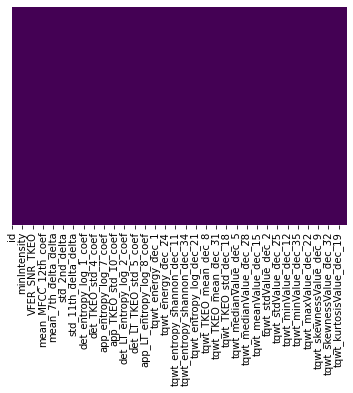

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col, df[col].unique())
        
df.isna().sum().sum()

0

In [11]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

<AxesSubplot:>

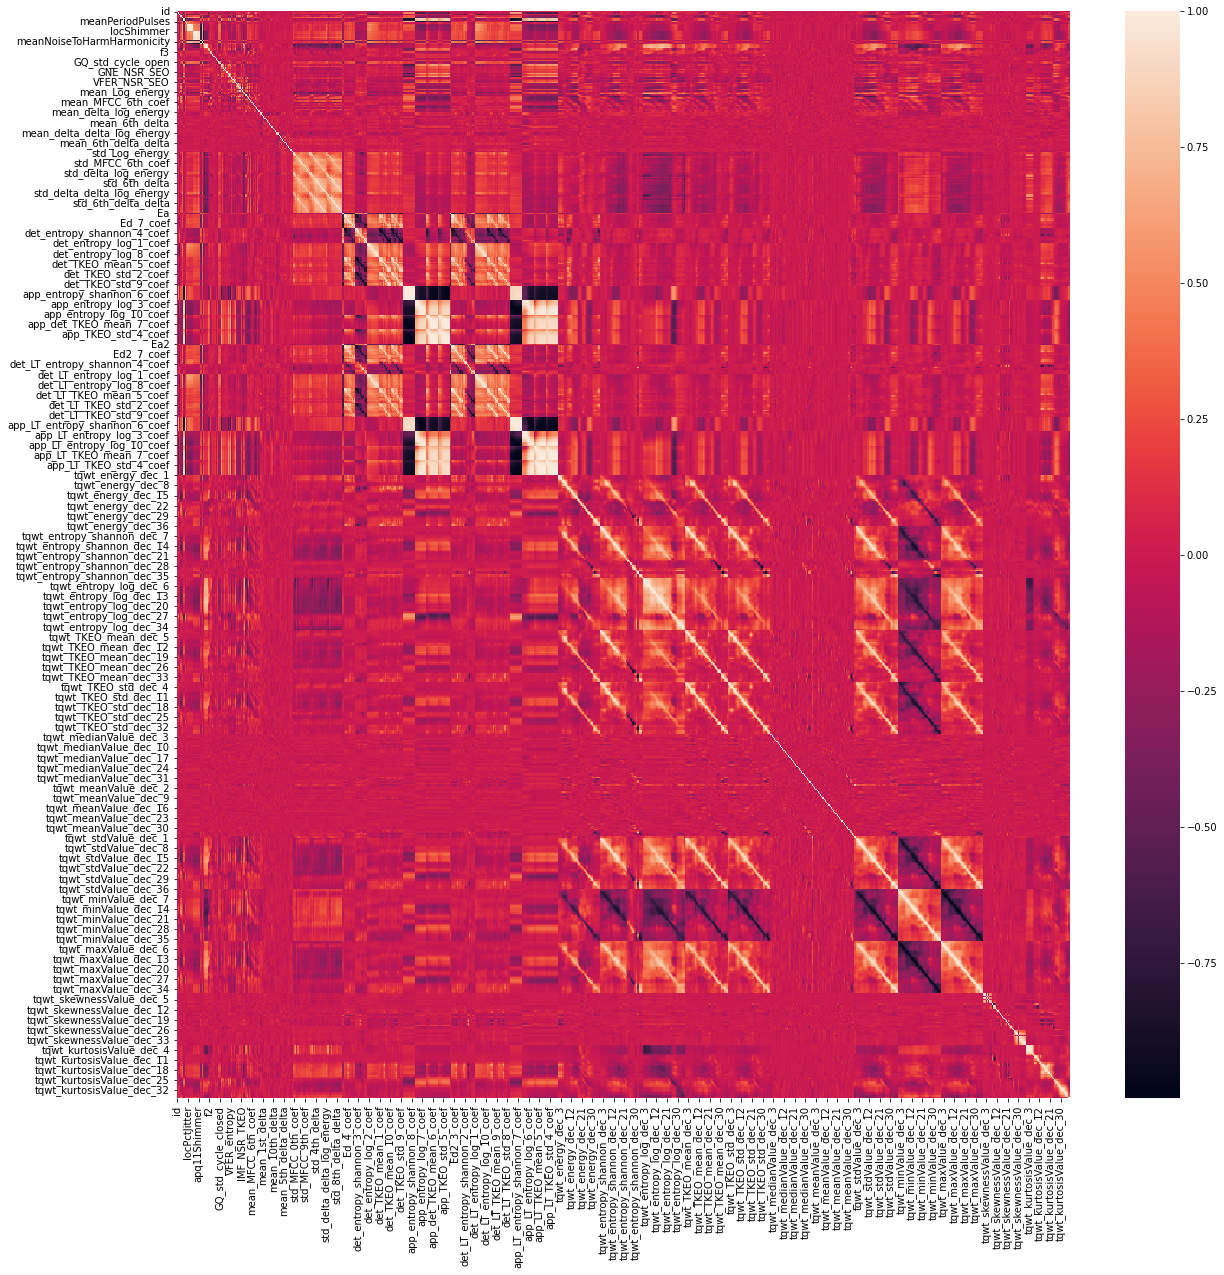

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [13]:
def preprocess_inputs(df):
    df = df.copy()
    df = df.drop('id', axis=1)
    
    y = df['class']
    X = df.drop('class',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.7, random_state=43, shuffle=True)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
209,-1.017859,0.481242,-1.699754,-0.173118,1.921806,1.917954,-1.419566,-0.439986,-0.536143,-0.569210,...,1.752312,1.379536,0.649755,-0.420627,-0.468728,-0.499912,-0.633358,-0.831251,-0.874553,-0.771677
559,0.982455,0.465816,1.624041,-0.415990,-0.513915,-0.509867,0.364251,-0.313811,-0.350432,-0.299368,...,-0.420482,-0.576278,-0.166186,-0.236269,-0.305115,-0.516451,-0.592921,1.561524,2.300495,2.497325
626,0.982455,0.434536,0.220343,-0.261490,0.129483,0.131444,-0.329119,-0.395506,0.080082,-0.086487,...,-0.419581,-0.583872,-0.612951,-0.637048,-0.552119,-0.497208,-0.586587,-0.750298,-0.762848,-0.785663
510,-1.017859,0.059528,-0.558285,0.118420,0.060547,0.062733,-0.261314,-0.373809,-0.337769,-0.353916,...,-0.417431,-0.345722,-0.420576,-0.577928,-0.428306,-0.132572,-0.205702,-0.540390,-0.442916,-0.625532
411,-1.017859,-0.240921,0.966453,1.521748,-0.605829,-0.601483,0.484167,-0.078975,1.147923,0.946541,...,-0.280263,-0.400112,-0.344942,-0.567583,-0.456136,-0.419815,-0.352319,-0.381697,-0.563082,-0.710596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0.982455,0.476100,-1.142222,-0.820422,-0.410512,-0.406799,0.237537,-0.404805,-0.422184,-0.365501,...,-0.422125,-0.565619,-0.471249,-0.550124,-0.225016,-0.116870,-0.000171,0.161010,0.050861,0.163484
58,0.982455,0.642858,-0.955729,1.008748,-0.031367,-0.028883,-0.183778,-0.434561,-0.396860,-0.386258,...,-0.410182,-0.507264,-0.550987,-0.582030,-0.492002,-0.539428,-0.637645,-0.733940,-0.586603,-0.044627
277,0.982455,0.327126,-1.158898,-0.831203,0.186929,0.188704,-0.374082,-0.382023,-0.312445,-0.349571,...,-0.401915,-0.555302,-0.600452,-0.626625,-0.520868,-0.503480,-0.507085,-0.363933,-0.551019,0.253941
255,0.982455,0.366619,0.853334,-1.237761,0.209908,0.211608,-0.399488,-0.359861,-0.320887,-0.358743,...,-0.078734,1.842117,2.356413,2.044606,0.896550,0.605199,0.915350,0.666637,0.642885,-0.588386


In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train,y_train)

In [16]:
models = {
    'Linear SVM : ':LinearSVC(),
    'XGBClassifier : ':xgb.XGBClassifier(),
    'Gradient Boosting : ':GradientBoostingClassifier(),
    'Decision Tree : ':DecisionTreeClassifier(),
    'Random Forest : ':RandomForestClassifier(),
    'KNeighborsClassifier : ':KNeighborsClassifier(),
    'Bagging Classifier : ':BaggingClassifier(),
    'Logistic Regression : ':LogisticRegression(),
}

for name, model in models.items():
    model = model.fit(X_train_smote,y_train_smote)
    print(name + " trained")

c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM :  trained
XGBClassifier :  trained
Gradient Boosting :  trained
Decision Tree :  trained
Random Forest :  trained
KNeighborsClassifier :  trained
Bagging Classifier :  trained
Logistic Regression :  trained


In [17]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test,y_test) * 100))

Linear SVM : : 79.62%
XGBClassifier : : 84.91%
Gradient Boosting : : 84.91%
Decision Tree : : 73.96%
Random Forest : : 83.96%
KNeighborsClassifier : : 72.64%
Bagging Classifier : : 83.21%
Logistic Regression : : 82.08%
